# Aprendizaje automático - Actividad 2 

## Clasificación con máquinas de vectores de soporte y redes de neuronas

Importación de librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Obtención de datos y creación del set de datos

In [2]:
dataSet_Entrenamiento = pd.read_csv("train.csv")

Revisión del set de datos

In [3]:
dataSet_Entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Análisis de los datos

Los datos ingresados son del tipo númerico, por lo que se sacará un análisis en base a ese tipo de dato.
Los datos estadísticos a sacar son: Media, desviación estándar, cuartiles y valor máximo.
No hay variables categóricas en este set de datos.
Se creará una matriz de correlaciones para identificar cuales son los datos más relacionados a la variable a predecir ("price_range").
No hay datos nulos en el set de datos, por lo que no es necesario hacer un tratamiento de nulos. Sin embargo, es muy útil saber qué datos son los más importantes para la variable que se quiere predecir.

In [4]:
dataSet_Entrenamiento.describe().transpose()

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [5]:
dataSet_Entrenamiento['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [6]:
dataSet_Entrenamiento['blue'].describe()

count    2000.0000
mean        0.4950
std         0.5001
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: blue, dtype: float64

In [7]:
dataSet_Entrenamiento['clock_speed'].describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

In [8]:
dataSet_Entrenamiento['dual_sim'].describe()

count    2000.000000
mean        0.509500
std         0.500035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dual_sim, dtype: float64

In [9]:
dataSet_Entrenamiento['fc'].describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [10]:
dataSet_Entrenamiento['four_g'].describe()

count    2000.000000
mean        0.521500
std         0.499662
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: four_g, dtype: float64

In [11]:
dataSet_Entrenamiento['int_memory'].describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

In [12]:
dataSet_Entrenamiento['m_dep'].describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [13]:
dataSet_Entrenamiento['mobile_wt'].describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

In [14]:
dataSet_Entrenamiento['n_cores'].describe()

count    2000.000000
mean        4.520500
std         2.287837
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max         8.000000
Name: n_cores, dtype: float64

In [15]:
dataSet_Entrenamiento['pc'].describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

In [16]:
dataSet_Entrenamiento['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [17]:
dataSet_Entrenamiento['px_width'].describe()

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

In [18]:
dataSet_Entrenamiento['ram'].describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

In [19]:
dataSet_Entrenamiento['sc_h'].describe()

count    2000.000000
mean       12.306500
std         4.213245
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

In [20]:
dataSet_Entrenamiento['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [21]:
dataSet_Entrenamiento['talk_time'].describe()

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

In [22]:
dataSet_Entrenamiento['three_g'].describe()

count    2000.000000
mean        0.761500
std         0.426273
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: three_g, dtype: float64

In [23]:
dataSet_Entrenamiento['touch_screen'].describe()

count    2000.000000
mean        0.503000
std         0.500116
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: touch_screen, dtype: float64

In [24]:
dataSet_Entrenamiento['wifi'].describe()

count    2000.000000
mean        0.507000
std         0.500076
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wifi, dtype: float64

In [25]:
dataSet_Entrenamiento['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

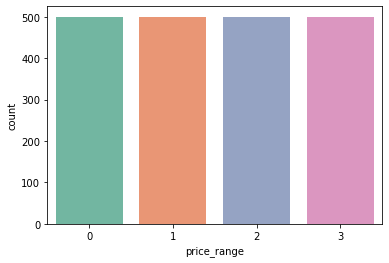

In [26]:
sns.countplot(x='price_range', data=dataSet_Entrenamiento, palette='Set2')
plt.show()

Tablas de distribuciones de las variables que lo permitan de mejor manera.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

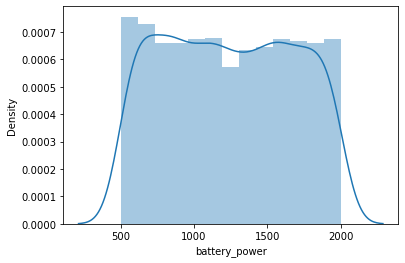

In [27]:
sns.distplot(dataSet_Entrenamiento.battery_power, hist=True, kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blue', ylabel='count'>

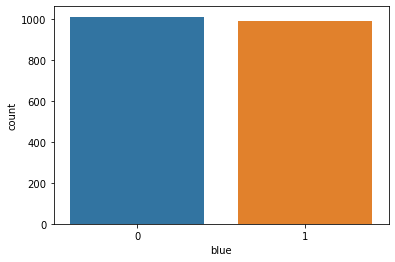

In [28]:
sns.countplot(dataSet_Entrenamiento.blue)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clock_speed'>

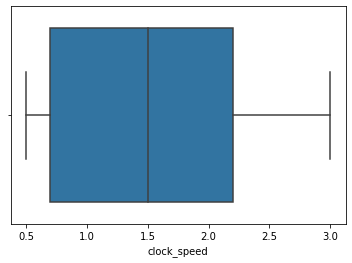

In [29]:
sns.boxplot(dataSet_Entrenamiento.clock_speed)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dual_sim', ylabel='count'>

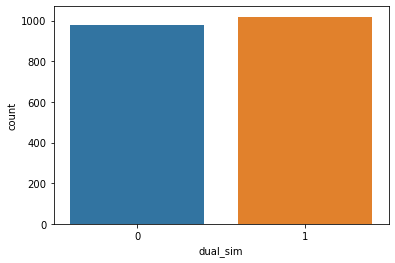

In [30]:
sns.countplot(dataSet_Entrenamiento.dual_sim)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='four_g', ylabel='count'>

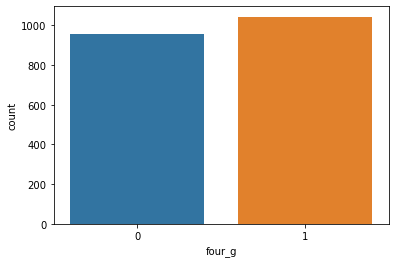

In [31]:
sns.countplot(dataSet_Entrenamiento.four_g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_memory', ylabel='Density'>

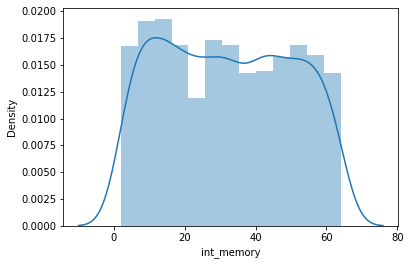

In [32]:
sns.distplot(dataSet_Entrenamiento.int_memory)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m_dep', ylabel='count'>

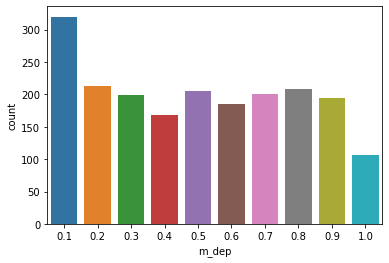

In [33]:
sns.countplot(dataSet_Entrenamiento.m_dep)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mobile_wt', ylabel='count'>

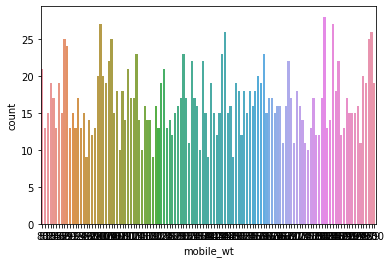

In [34]:
sns.countplot(dataSet_Entrenamiento.mobile_wt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_cores', ylabel='count'>

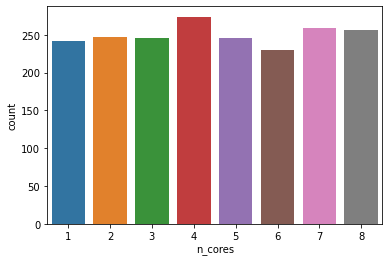

In [35]:
sns.countplot(dataSet_Entrenamiento.n_cores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc', ylabel='Density'>

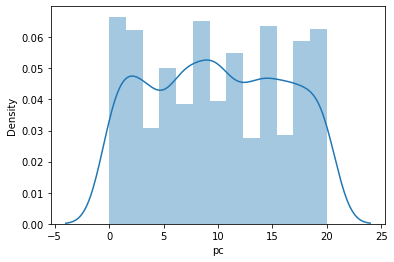

In [36]:
sns.distplot(dataSet_Entrenamiento.pc)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_height'>

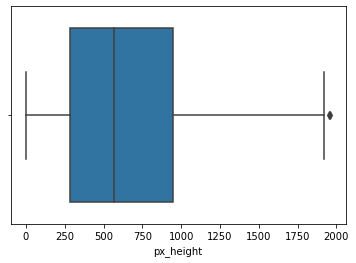

In [37]:
sns.boxplot(dataSet_Entrenamiento.px_height)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_width'>

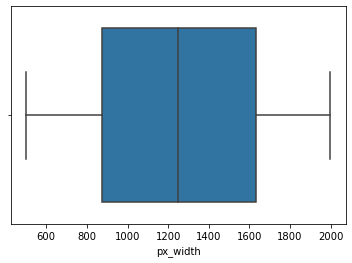

In [38]:
sns.boxplot(dataSet_Entrenamiento.px_width)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram'>

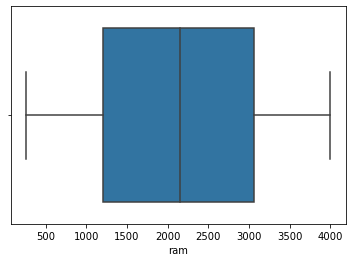

In [39]:
sns.boxplot(dataSet_Entrenamiento.ram)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sc_h'>

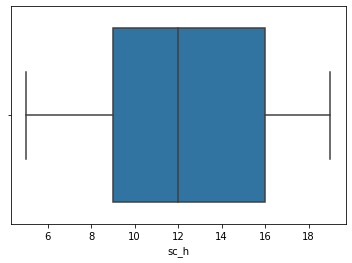

In [40]:
sns.boxplot(dataSet_Entrenamiento.sc_h)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sc_w'>

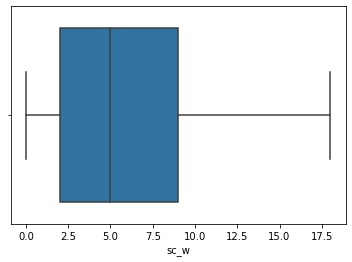

In [41]:
sns.boxplot(dataSet_Entrenamiento.sc_w)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='talk_time', ylabel='Density'>

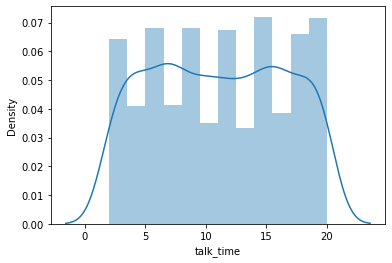

In [42]:
sns.distplot(dataSet_Entrenamiento.talk_time, hist=True, kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='three_g', ylabel='count'>

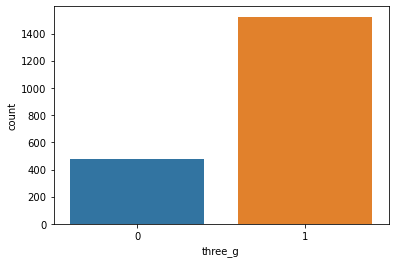

In [43]:
sns.countplot(dataSet_Entrenamiento.three_g)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='touch_screen', ylabel='count'>

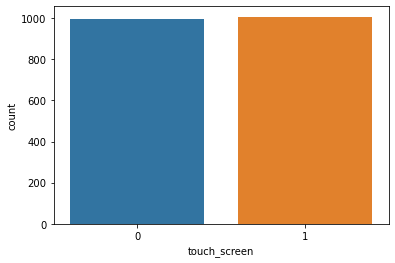

In [44]:
sns.countplot(dataSet_Entrenamiento.touch_screen)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wifi', ylabel='count'>

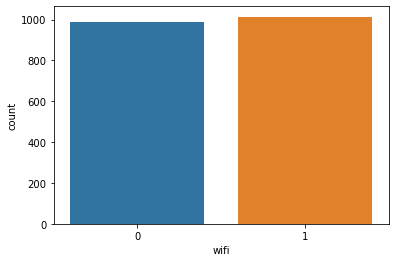

In [45]:
sns.countplot(dataSet_Entrenamiento.wifi)

## Creación de la matriz de correlaciones

Se va a crear la matriz de correlaciones de las variables numéricas (en este caso, todas las variables)

<function matplotlib.pyplot.show(close=None, block=None)>

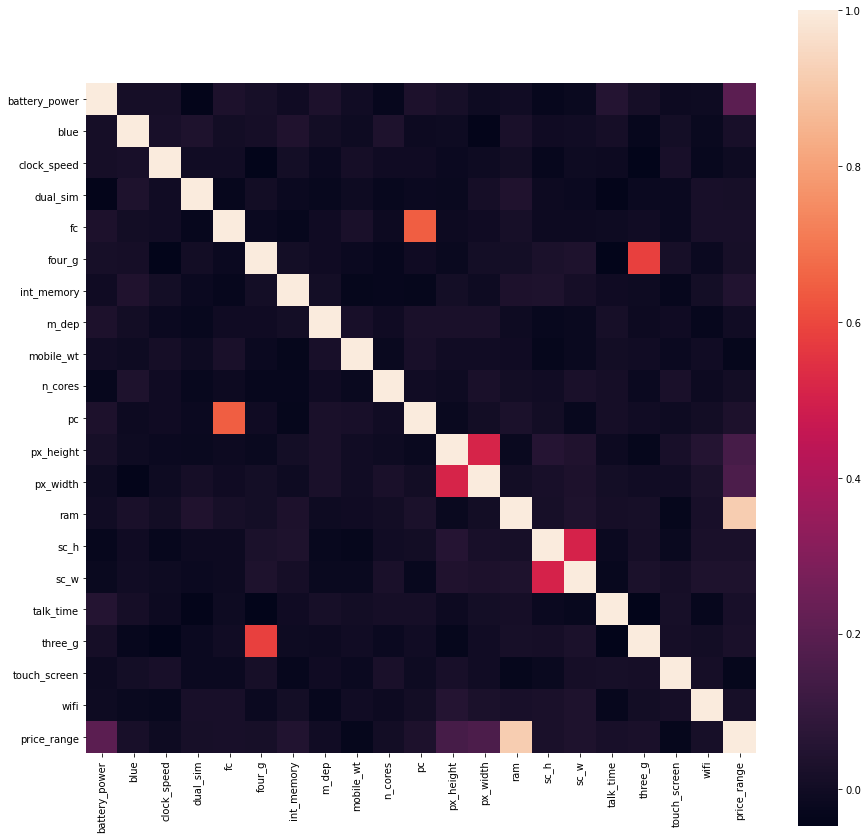

In [46]:
correlaciones = dataSet_Entrenamiento.corr()
figura, axis = plt.subplots(figsize=(15,15))
sns.heatmap(correlaciones,square=True)
plt.show

In [47]:
print(correlaciones['price_range'].sort_values(ascending=False)[:10],'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
Name: price_range, dtype: float64 



Se puede observar que la variable que tiene mayor relación con el precio es la ram, seguida (lejanamente) del poder de la batería y las dimensiones.

## Red Neuronal

Creación de la red neuronal a través de Scikit Learn 

Definición de los vectores utilizados para generar los datos necesarios.

In [48]:
dataSet_Usable = 0
dataSet_Usable = dataSet_Entrenamiento
objetivo = ['price_range']

predictores = list(set(list(dataSet_Usable))-set(objetivo))

#Muestro los valores estadísticos antes de la normalización
dataSet_Usable.describe().transpose()


count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [49]:
#Normalización
dataSet_Usable[predictores] = dataSet_Usable[predictores]/dataSet_Usable[predictores].max()

dataSet_Usable.describe().transpose()

count      mean       std       min       25%       50%  \
battery_power  2000.0  0.619879  0.219929  0.250751  0.426301  0.613614   
blue           2000.0  0.495000  0.500100  0.000000  0.000000  0.000000   
clock_speed    2000.0  0.507417  0.272001  0.166667  0.233333  0.500000   
dual_sim       2000.0  0.509500  0.500035  0.000000  0.000000  1.000000   
fc             2000.0  0.226816  0.228497  0.000000  0.052632  0.157895   
four_g         2000.0  0.521500  0.499662  0.000000  0.000000  1.000000   
int_memory     2000.0  0.500727  0.283527  0.031250  0.250000  0.500000   
m_dep          2000.0  0.501750  0.288416  0.100000  0.200000  0.500000   
mobile_wt      2000.0  0.701245  0.176998  0.400000  0.545000  0.705000   
n_cores        2000.0  0.565063  0.285980  0.125000  0.375000  0.500000   
pc             2000.0  0.495825  0.303216  0.000000  0.250000  0.500000   
px_height      2000.0  0.329137  0.226419  0.000000  0.144260  0.287755   
px_width       2000.0  0.626384  0.216316  0.250250  0.437813  0.624124   
ram            2000.0  0.531319  0.271319  0.064032  0.302026  0.536893   
sc_h           2000.0  0.647711  0.221750  0.263158  0.473684  0.631579   
sc_w           2000.0  0.320389  0.242022  0.000000  0.111111  0.277778   
talk_time      2000.0  0.550550  0.273198  0.100000  0.300000  0.550000   
three_g        2000.0  0.761500  0.426273  0.000000  1.000000  1.000000   
touch_screen   2000.0  0.503000  0.500116  0.000000  0.000000  1.000000   
wifi           2000.0  0.507000  0.500076  0.000000  0.000000  1.000000   
price_range    2000.0  1.500000  1.118314  0.000000  0.750000  1.500000   

                    75%  max  
battery_power  0.808433  1.0  
blue           1.000000  1.0  
clock_speed    0.733333  1.0  
dual_sim       1.000000  1.0  
fc             0.368421  1.0  
four_g         1.000000  1.0  
int_memory     0.750000  1.0  
m_dep          0.800000  1.0  
mobile_wt      0.850000  1.0  
n_cores        0.875000  1.0  
pc             0.750000  1.0  
px_height      0.483291  1.0  
px_width       0.817317  1.0  
ram            0.766508  1.0  
sc_h           0.842105  1.0  
sc_w           0.500000  1.0  
talk_time      0.800000  1.0  
three_g        1.000000  1.0  
touch_screen   1.000000  1.0  
wifi           1.000000  1.0  
price_range    2.250000  3.0

In [50]:
X = dataSet_Usable[predictores].values
y = dataSet_Usable[objetivo].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

(1400, 20)
(600, 20)
(1400, 1)
(600, 1)


In [51]:
dataSet_Entrenamiento['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [52]:
from sklearn.neural_network import MLPClassifier
y_usable = np.ravel(y_train)
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=10000)
mlp.fit(X_train,y_usable)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[335   2   0   0]
 [  1 344   5   0]
 [  0   2 353   6]
 [  0   0   1 351]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       337
           1       0.99      0.98      0.99       350
           2       0.98      0.98      0.98       361
           3       0.98      1.00      0.99       352

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



In [54]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[155   8   0   0]
 [  7 140   3   0]
 [  0   1 131   7]
 [  0   0   4 144]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       163
           1       0.94      0.93      0.94       150
           2       0.95      0.94      0.95       139
           3       0.95      0.97      0.96       148

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



Validación cruzada

In [55]:
from sklearn.model_selection import cross_val_score
Y_Validaciones = np.ravel(y)
puntajes_cv = cross_val_score(mlp, X, Y_Validaciones, cv=5)
puntajes_cv

array([0.95 , 0.955, 0.955, 0.93 , 0.965])

In [56]:
print("%0.2f de precisión en promedio "  % (puntajes_cv.mean() * 100))

95.10 de precisión en promedio 


## SVM - Máquina de vectores de soporte

In [57]:
dataSet_Usable_SVM = 0
dataSet_Usable_SVM = dataSet_Entrenamiento
objetivo_SVM = ['price_range']
predictores_SVM = list(set(list(dataSet_Usable_SVM))-set(objetivo_SVM))
dataSet_Usable_SVM[predictores_SVM] = dataSet_Usable_SVM[predictores_SVM]/dataSet_Usable_SVM[predictores_SVM].max()
dataSet_Usable_SVM.describe().transpose()

count      mean       std       min       25%       50%  \
battery_power  2000.0  0.619879  0.219929  0.250751  0.426301  0.613614   
blue           2000.0  0.495000  0.500100  0.000000  0.000000  0.000000   
clock_speed    2000.0  0.507417  0.272001  0.166667  0.233333  0.500000   
dual_sim       2000.0  0.509500  0.500035  0.000000  0.000000  1.000000   
fc             2000.0  0.226816  0.228497  0.000000  0.052632  0.157895   
four_g         2000.0  0.521500  0.499662  0.000000  0.000000  1.000000   
int_memory     2000.0  0.500727  0.283527  0.031250  0.250000  0.500000   
m_dep          2000.0  0.501750  0.288416  0.100000  0.200000  0.500000   
mobile_wt      2000.0  0.701245  0.176998  0.400000  0.545000  0.705000   
n_cores        2000.0  0.565063  0.285980  0.125000  0.375000  0.500000   
pc             2000.0  0.495825  0.303216  0.000000  0.250000  0.500000   
px_height      2000.0  0.329137  0.226419  0.000000  0.144260  0.287755   
px_width       2000.0  0.626384  0.216316  0.250250  0.437813  0.624124   
ram            2000.0  0.531319  0.271319  0.064032  0.302026  0.536893   
sc_h           2000.0  0.647711  0.221750  0.263158  0.473684  0.631579   
sc_w           2000.0  0.320389  0.242022  0.000000  0.111111  0.277778   
talk_time      2000.0  0.550550  0.273198  0.100000  0.300000  0.550000   
three_g        2000.0  0.761500  0.426273  0.000000  1.000000  1.000000   
touch_screen   2000.0  0.503000  0.500116  0.000000  0.000000  1.000000   
wifi           2000.0  0.507000  0.500076  0.000000  0.000000  1.000000   
price_range    2000.0  1.500000  1.118314  0.000000  0.750000  1.500000   

                    75%  max  
battery_power  0.808433  1.0  
blue           1.000000  1.0  
clock_speed    0.733333  1.0  
dual_sim       1.000000  1.0  
fc             0.368421  1.0  
four_g         1.000000  1.0  
int_memory     0.750000  1.0  
m_dep          0.800000  1.0  
mobile_wt      0.850000  1.0  
n_cores        0.875000  1.0  
pc             0.750000  1.0  
px_height      0.483291  1.0  
px_width       0.817317  1.0  
ram            0.766508  1.0  
sc_h           0.842105  1.0  
sc_w           0.500000  1.0  
talk_time      0.800000  1.0  
three_g        1.000000  1.0  
touch_screen   1.000000  1.0  
wifi           1.000000  1.0  
price_range    2.250000  3.0

In [58]:
X_SVM = dataSet_Usable_SVM[predictores].values
y_SVM = dataSet_Usable_SVM[objetivo].values

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, test_size=0.30, random_state=40)
print(X_train_SVM.shape); print(X_test_SVM.shape); print(y_SVM.shape); print(y_train_SVM.shape); print(y_test_SVM.shape)

(1400, 20)
(600, 20)
(2000, 1)
(1400, 1)
(600, 1)


In [59]:
from sklearn.svm import SVC
y_usable_SVM = np.ravel(y_train_SVM)
maquina = SVC(C = 100, kernel = 'linear', random_state=123)
maquina.fit(X_train_SVM,y_usable_SVM)

predict_train_SVM = maquina.predict(X_train_SVM)
predict_test_SVM = maquina.predict(X_test_SVM)

In [60]:
print(confusion_matrix(y_train_SVM,predict_train_SVM))
print(classification_report(y_train_SVM,predict_train_SVM))

[[334   3   0   0]
 [  1 347   2   0]
 [  0   5 354   2]
 [  0   0   5 347]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       337
           1       0.98      0.99      0.98       350
           2       0.98      0.98      0.98       361
           3       0.99      0.99      0.99       352

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



In [61]:
print(confusion_matrix(y_test_SVM,predict_test_SVM))
print(classification_report(y_test_SVM,predict_test_SVM))

[[159   4   0   0]
 [  5 143   2   0]
 [  0   3 133   3]
 [  0   0   4 144]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       163
           1       0.95      0.95      0.95       150
           2       0.96      0.96      0.96       139
           3       0.98      0.97      0.98       148

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600



Validación cruzada

In [62]:
from sklearn.model_selection import cross_val_score
Y_Validaciones_SVM = np.ravel(y_SVM)
puntajes_cv_SVM = cross_val_score(mlp, X_SVM, Y_Validaciones_SVM, cv=5)
puntajes_cv_SVM

array([0.9525, 0.9525, 0.955 , 0.965 , 0.9625])

In [63]:
print("%0.2f de precisión en promedio "  % (puntajes_cv_SVM.mean() * 100))

95.75 de precisión en promedio 


PRUEBAS DE PREDICCIONES

In [64]:
dataSet_Test = pd.read_csv("test.csv")

objetivoTest = ['price_range']
predictoresTest = list(set(list(dataSet_Test))-set(objetivoTest))

dataSet_Test[predictoresTest] = dataSet_Test[predictoresTest]/dataSet_Test[predictoresTest].max()

Xtest = dataSet_Test[predictores].values
#ytest = dataSet_Test[objetivoTest].values

predictTest = mlp.predict(Xtest)